### Carga de los Datos de Boston Housing


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [9]:
!pip install scikit-learn

In [28]:
# cargar los datos desde scikit-learn
#from sklearn.datasets import load_boston

#boston = load_boston()
#boston = pd.read_csv("HousingData.csv")
#boston = pd.read_csv("boston.csv")
boston = pd.read_csv("boston-housing-dataset.csv")
print(boston.keys())
print(boston)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0 

In [29]:
boston_ds = pd.DataFrame(boston, columns= boston.keys())
boston_ds.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
#Eliminar los espacios vacíos y nulos
boston_ds.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

###Exploración de los Datos

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


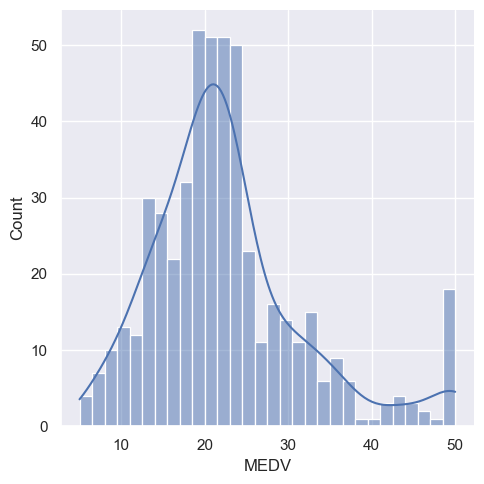

In [31]:
sns.set(rc = {'figure.figsize': (20,10)})
sns.displot(boston_ds['MEDV'], bins = 30, kde = True)
plt.show()

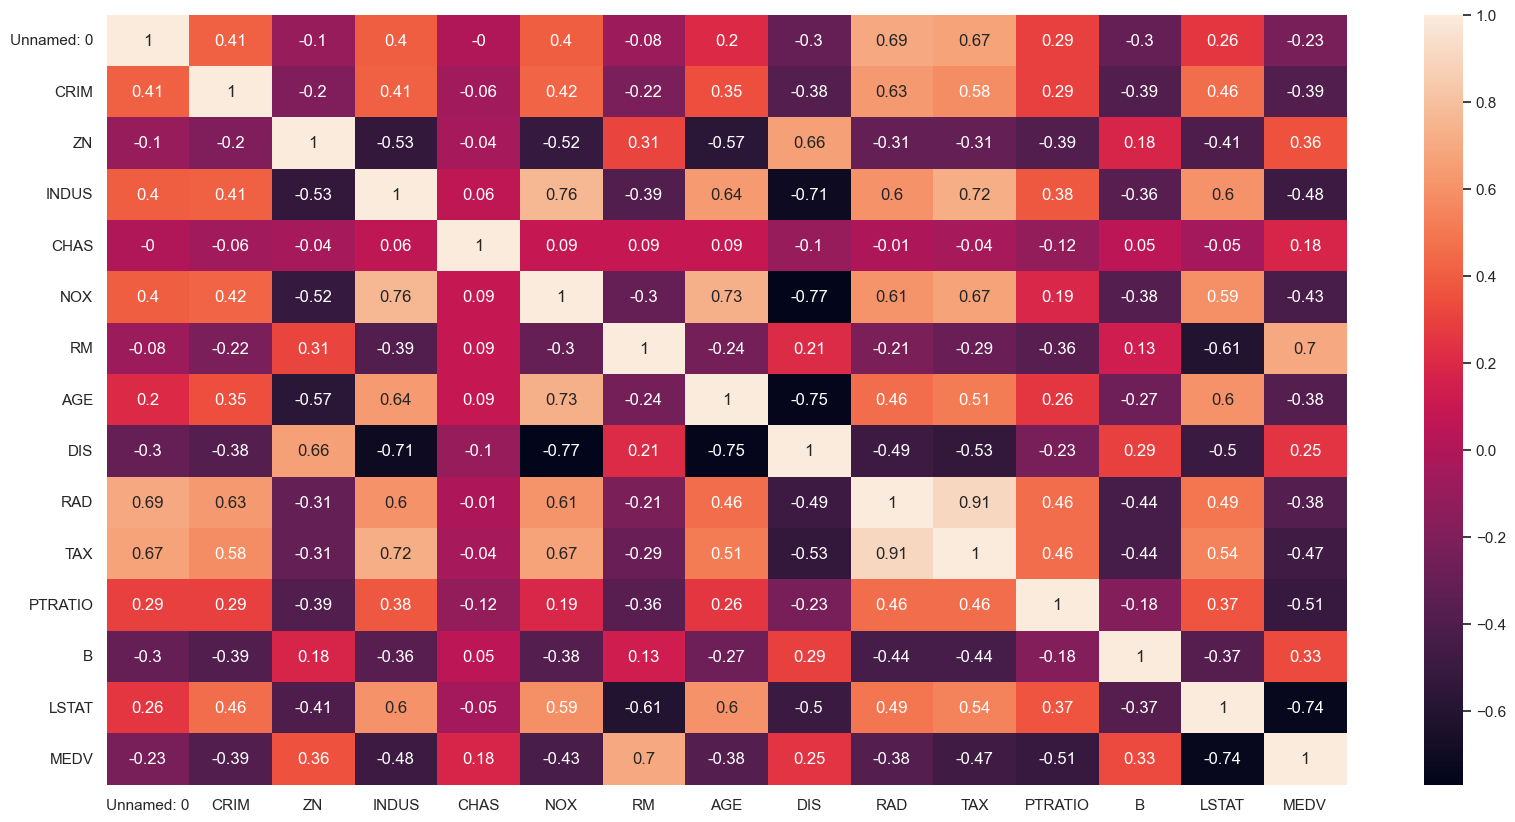

In [32]:
#Matriz de correlación
matriz_corr = boston_ds.corr().round(2)
#print(matriz_corr)
sns.heatmap(data = matriz_corr, annot=True);

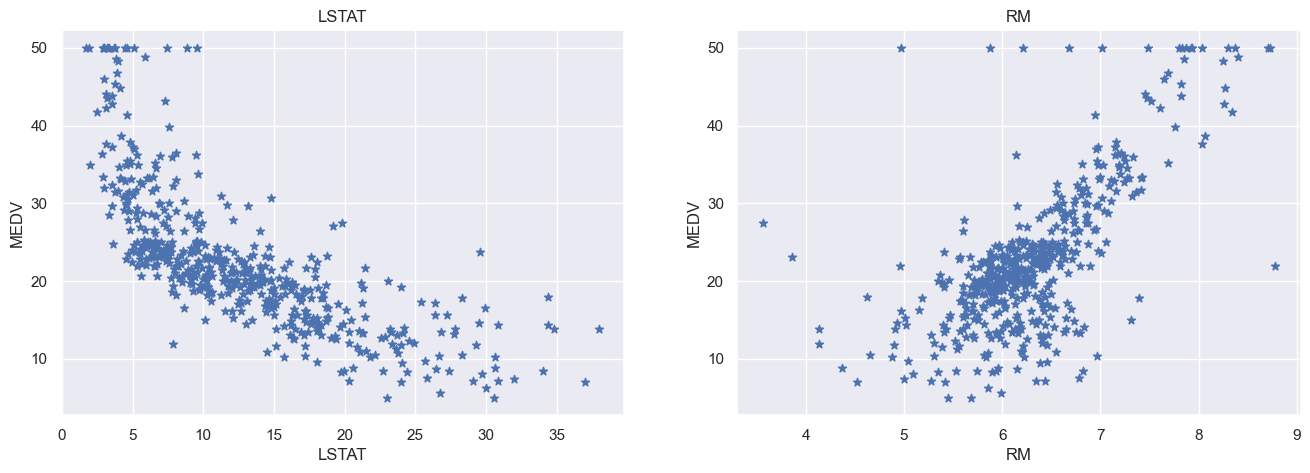

In [33]:
#Graficar LSTAT y RM
plt.figure(figsize= (16,5))

atributos = ['LSTAT', 'RM']
objetivo = boston_ds['MEDV']

for i, col in enumerate(atributos):
  plt.subplot(1, len(atributos), i+1)
  x = boston_ds[col]
  y = objetivo

  plt.scatter(x,y,marker='*')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

###Preprocesamiento de Datos

In [34]:
#Dividir los conjuntos en X  e Y (Datos de entrada y Datos de salida)
X = pd.DataFrame(np.c_[boston_ds['LSTAT']], columns=['LSTAT'])
y = boston_ds['MEDV']

In [35]:
# Separar entre los conjuntos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 10)

print("Entrenamiento: X = {}, y = {}".format(X_train.shape, y_train.shape))
print("Testeo: X = {}, y = {}".format(X_test.shape, y_test.shape))

Entrenamiento: X = (404, 1), y = (404,)
Testeo: X = (102, 1), y = (102,)


###Crear Modelo

In [36]:
#Creación del modelo de regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression() #Hipótesis

In [37]:
#Entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [38]:
# Evaluación del Entrenamiento con el modelo

y_predicted = modelo.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_predicted))
r2 = r2_score(y_train, y_predicted)

print("Rendimiento del conjunto de Entrenamiento")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

Rendimiento del conjunto de Entrenamiento
RMSE: 5.814319896298229
R2: 0.560733590611812


In [39]:
# Evaluación del Test con el modelo

y_predicted = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

print("Rendimiento del conjunto de Testeo")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

Rendimiento del conjunto de Testeo
RMSE: 7.587524204790588
R2: 0.44951123968029405


###Gráficas de Rendimiento

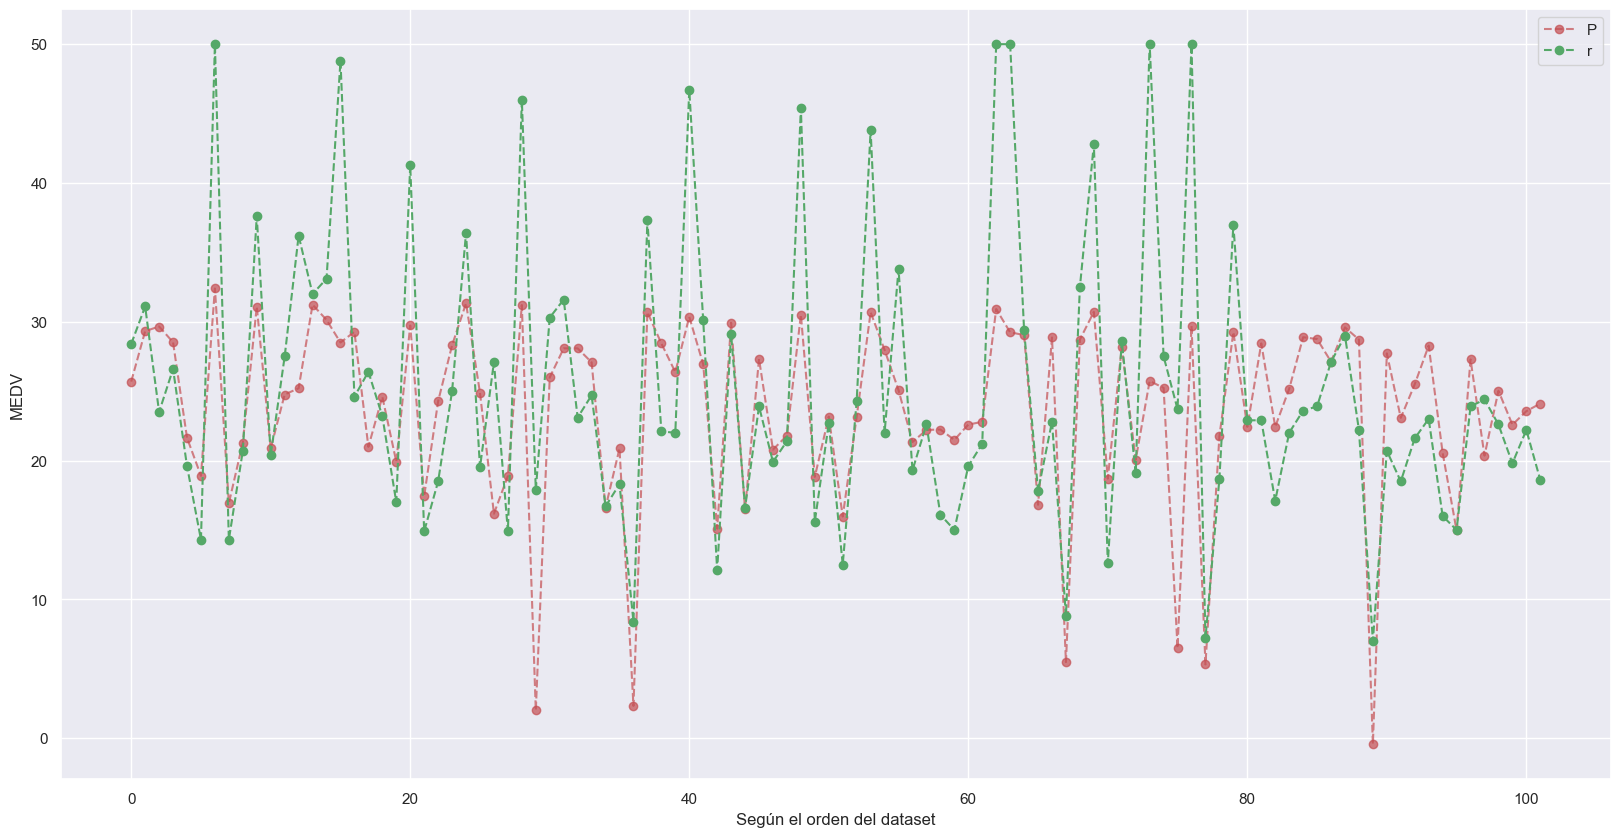

In [40]:
#Gráfica de rendimiento de las predicciones

eje_x = np.array(range(0, y_predicted.shape[0]))

plt.plot(eje_x, y_predicted, linestyle = "--", marker = "o", alpha= 0.7, color= "r", label = "Predicciones")
plt.plot(eje_x, y_test, linestyle = "--", marker = "o", color= "g", label = "y_test")
plt.xlabel("Según el orden del dataset")
plt.ylabel("MEDV")
plt.legend("Predicciones VS Valores Reales")
plt.show()

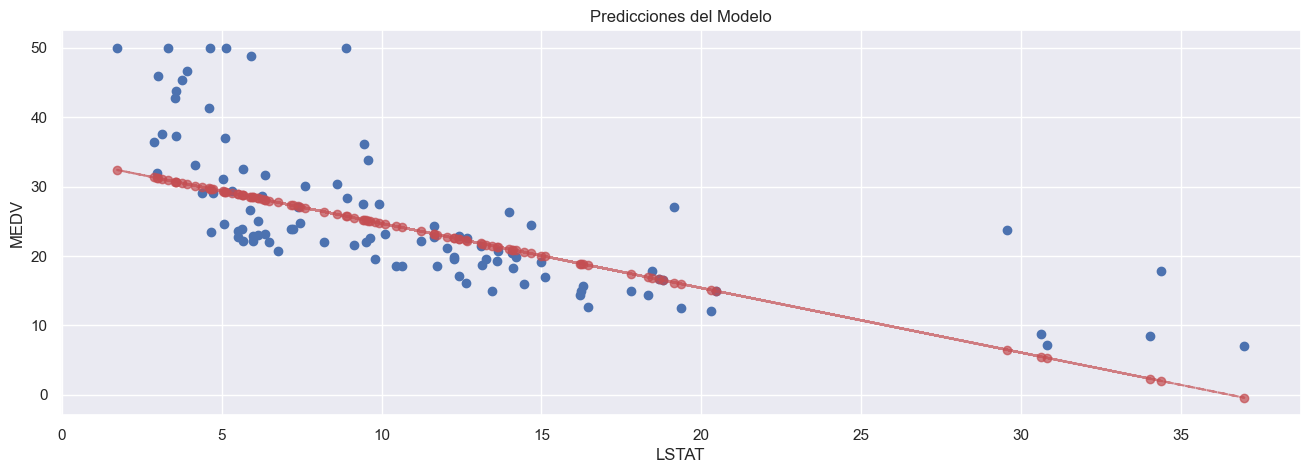

In [41]:
#Gráfica ordenada por el modelo

plt.figure(figsize=(16,5))


plt.plot(X_test, y_predicted, linestyle = "--", marker = "o", alpha= 0.7, color= "r", label = "Predicciones")
plt.scatter(X_test,y_test, marker="o")
plt.title("Predicciones del Modelo")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

###Comparando con otros modelos (Hipótesis)

In [42]:
def probar_modelo(tipo_hipotesis, X_train, y_train, X_test, y_test):
  modelo = tipo_hipotesis
  modelo.fit(X_train, y_train)

  # Evaluación del Entrenamiento con el modelo

  y_train_predicted = modelo.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2 = r2_score(y_train, y_train_predicted)

  print("Rendimiento del conjunto de Entrenamiento")
  print("RMSE: {}".format(rmse))
  print("R2: {}".format(r2))

  # Evaluación del Test con el modelo

  y_test_predicted = modelo.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  r2 = r2_score(y_test, y_test_predicted)

  print("Rendimiento del conjunto de Testeo")
  print("RMSE: {}".format(rmse))
  print("R2: {}".format(r2))

  #Gráfica de rendimiento de las predicciones

  eje_x = np.array(range(0, y_test_predicted.shape[0]))

  plt.plot(eje_x, y_test_predicted, linestyle = "--", marker = "o", alpha= 0.7, color= "r", label = "Predicciones")
  plt.plot(eje_x, y_test, linestyle = "--", marker = "o", color= "g", label = "y_test")
  plt.xlabel("Según el orden del dataset")
  plt.ylabel("MEDV")
  plt.legend("Predicciones VS Valores Reales")
  plt.show()

  #Gráfica ordenada por el modelo
  modelo_desordenado = pd.DataFrame(np.c_[X_test, y_test_predicted], columns=['LSTAT','MEDV_'])
  modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending = True)

  plt.figure(figsize=(16,5))


  plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker = "o", alpha= 0.7, color= "r", label = "Predicciones")
  plt.scatter(X_test,y_test, marker="o")
  plt.title("Predicciones del Modelo")
  plt.xlabel("LSTAT")
  plt.ylabel("MEDV")
  plt.show()

Probando el Modelo Lasso
Rendimiento del conjunto de Entrenamiento
RMSE: 5.816048217625798
R2: 0.5604724056913158
Rendimiento del conjunto de Testeo
RMSE: 7.603166356402437
R2: 0.4472391666574008


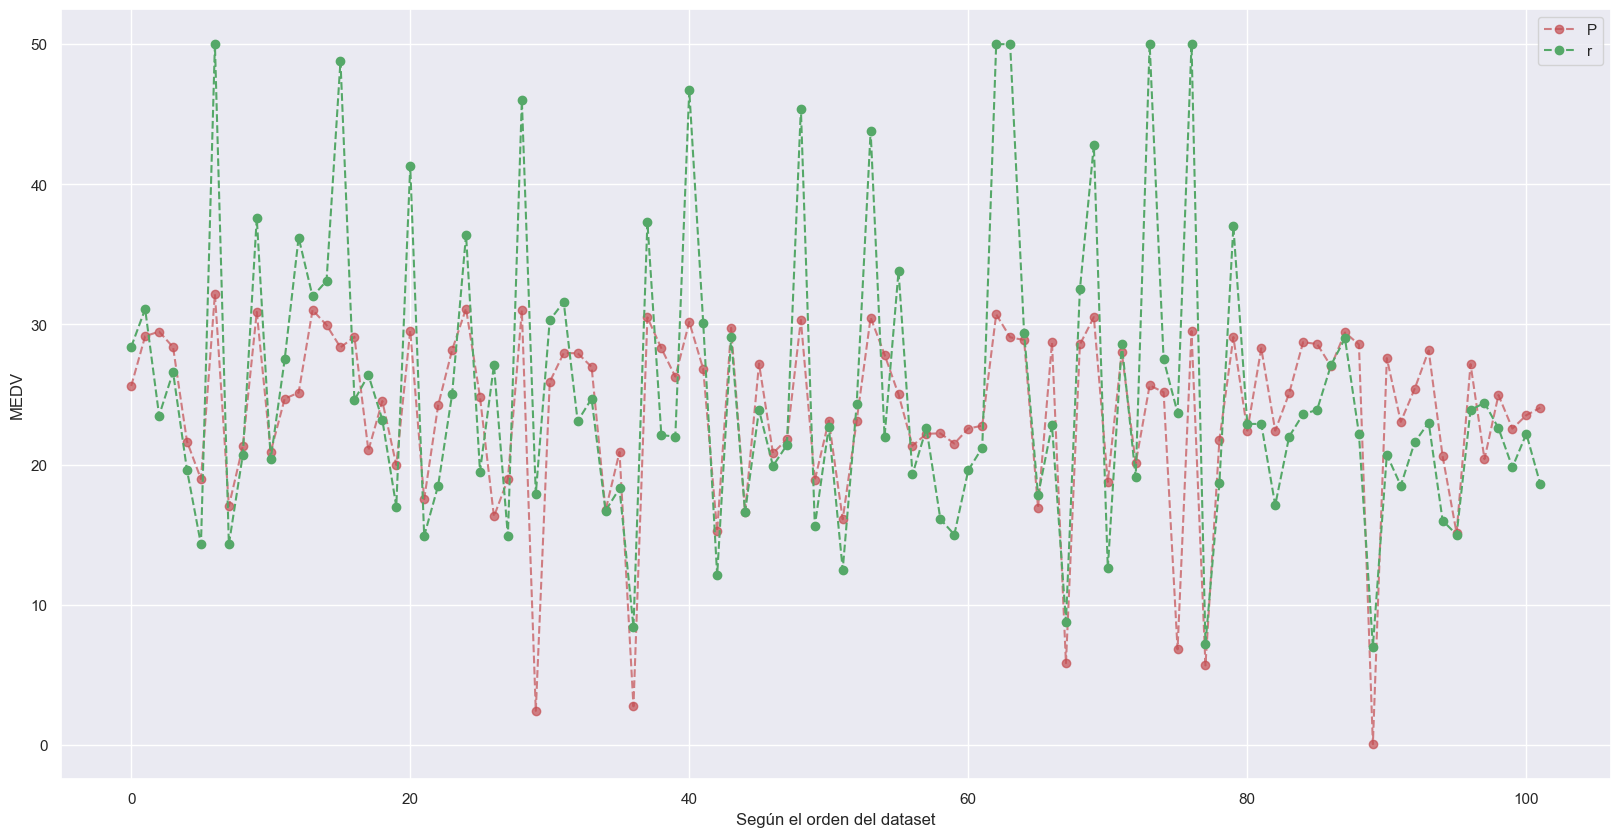

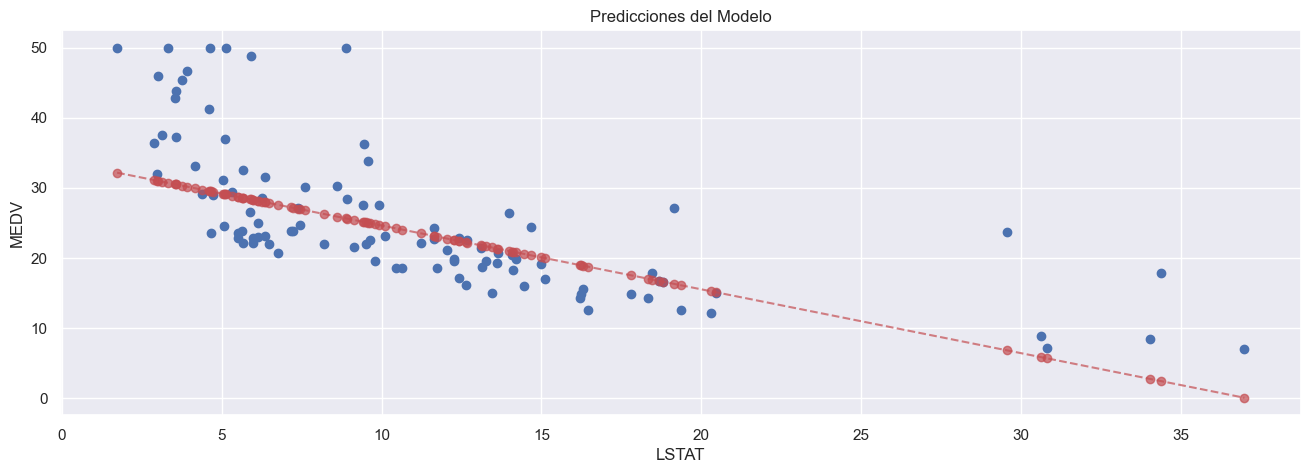

In [43]:
from sklearn.linear_model import Lasso

print("Probando el Modelo Lasso")
probar_modelo(Lasso(), X_train, y_train, X_test, y_test)

Probando el ARD
Rendimiento del conjunto de Entrenamiento
RMSE: 5.814333918927871
R2: 0.5607314718162484
Rendimiento del conjunto de Testeo
RMSE: 7.588811635380868
R2: 0.44932441294286984


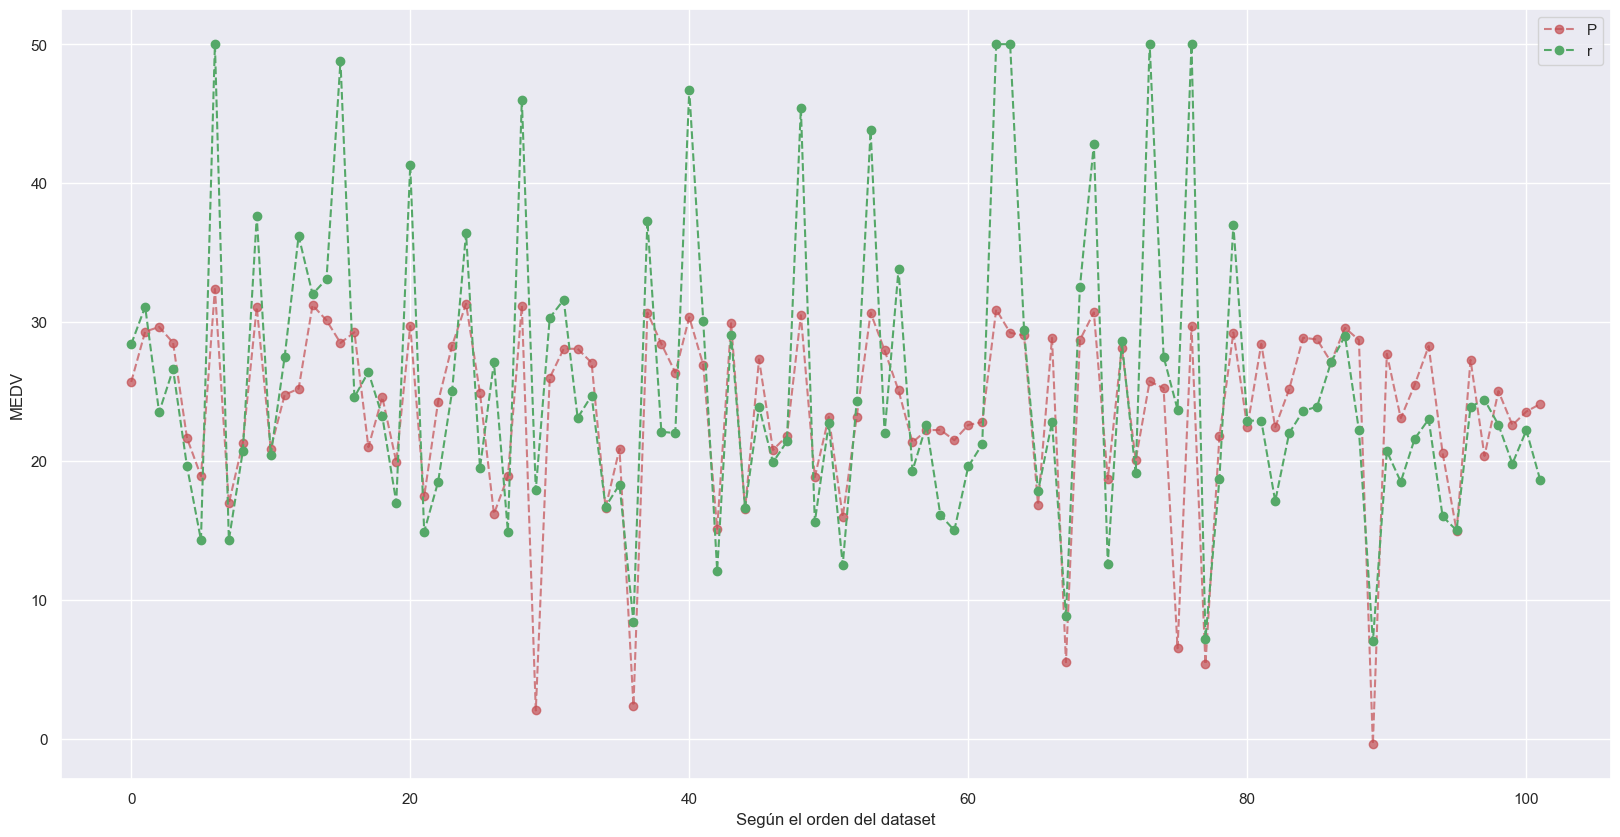

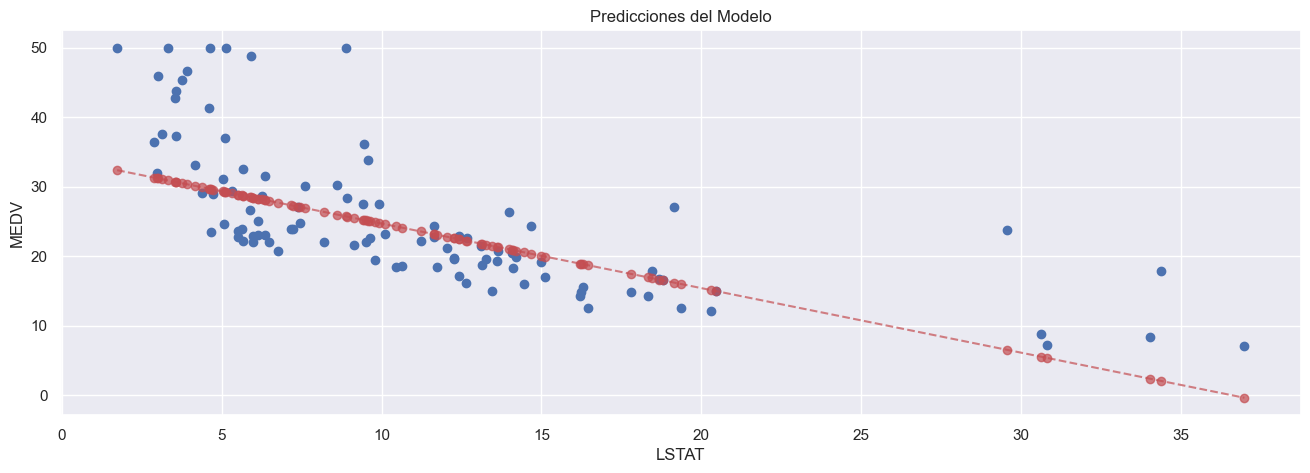

In [44]:
from sklearn.linear_model import ARDRegression

print("Probando el ARD")
probar_modelo(ARDRegression(), X_train, y_train, X_test, y_test)

Probando el SVM
Rendimiento del conjunto de Entrenamiento
RMSE: 5.398326029727825
R2: 0.6213409252056445
Rendimiento del conjunto de Testeo
RMSE: 7.302180370988369
R2: 0.4901371261162589


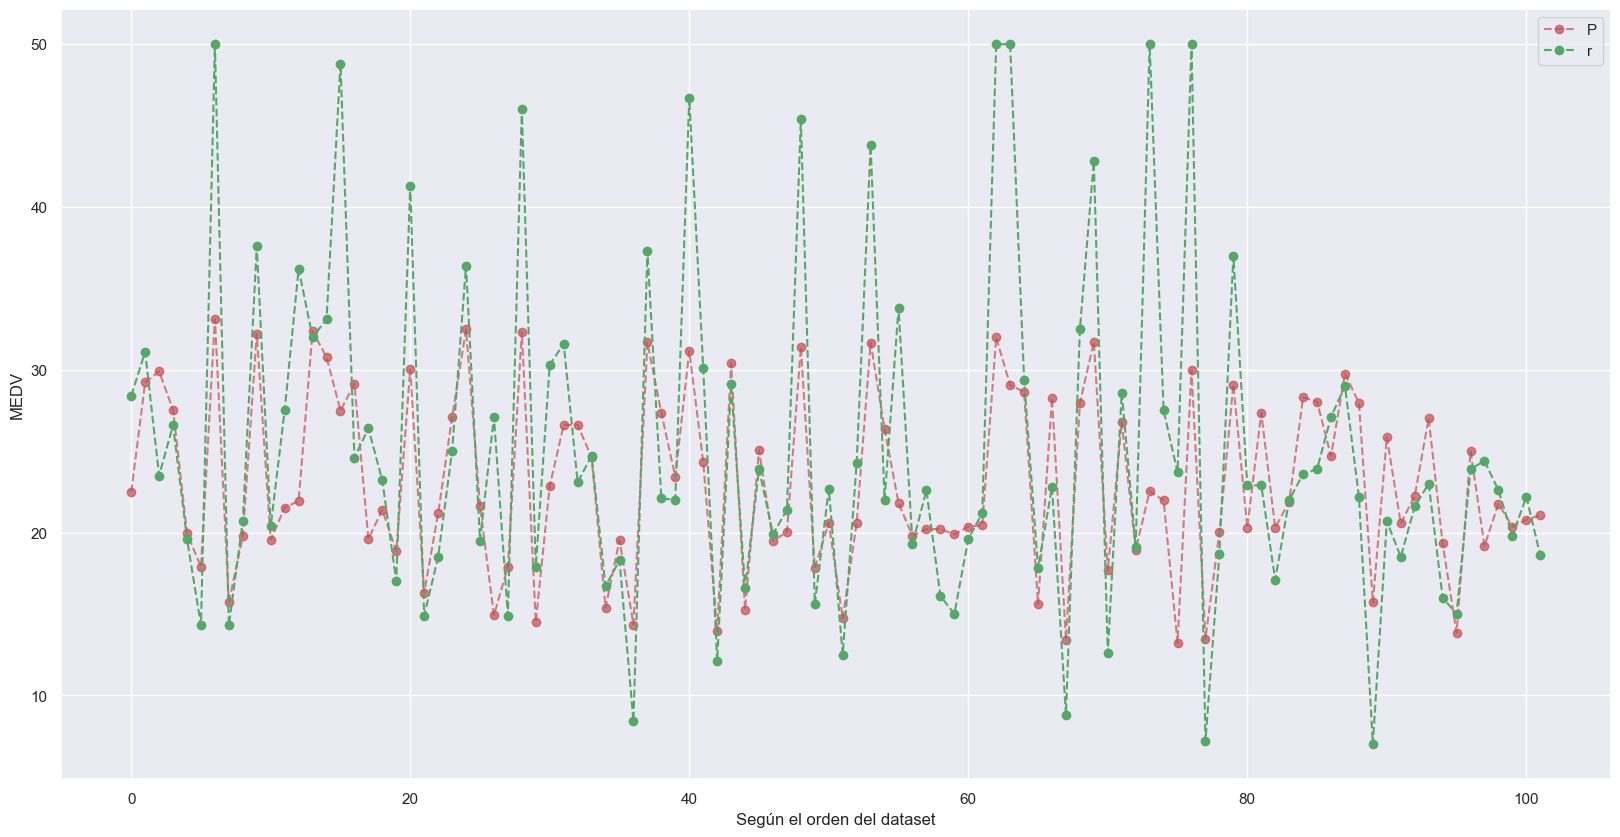

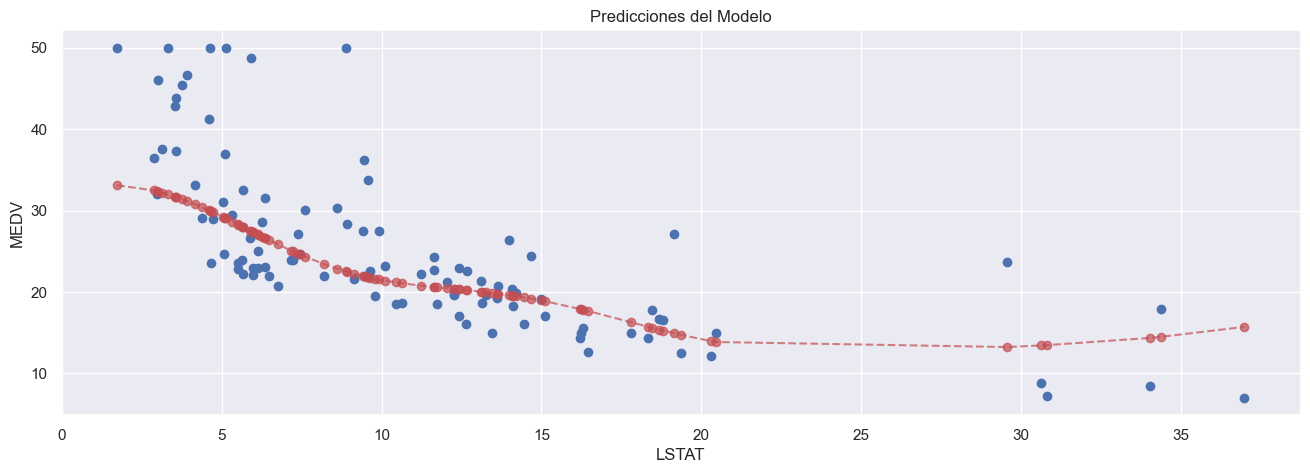

In [46]:
from sklearn.svm import SVR

print("Probando el SVM")
probar_modelo(SVR(), X_train, y_train, X_test, y_test)

Probando el DTR
Rendimiento del conjunto de Entrenamiento
RMSE: 1.5519310870685916
R2: 0.9687049957667602
Rendimiento del conjunto de Testeo
RMSE: 8.695233368537806
R2: 0.2770458386848019


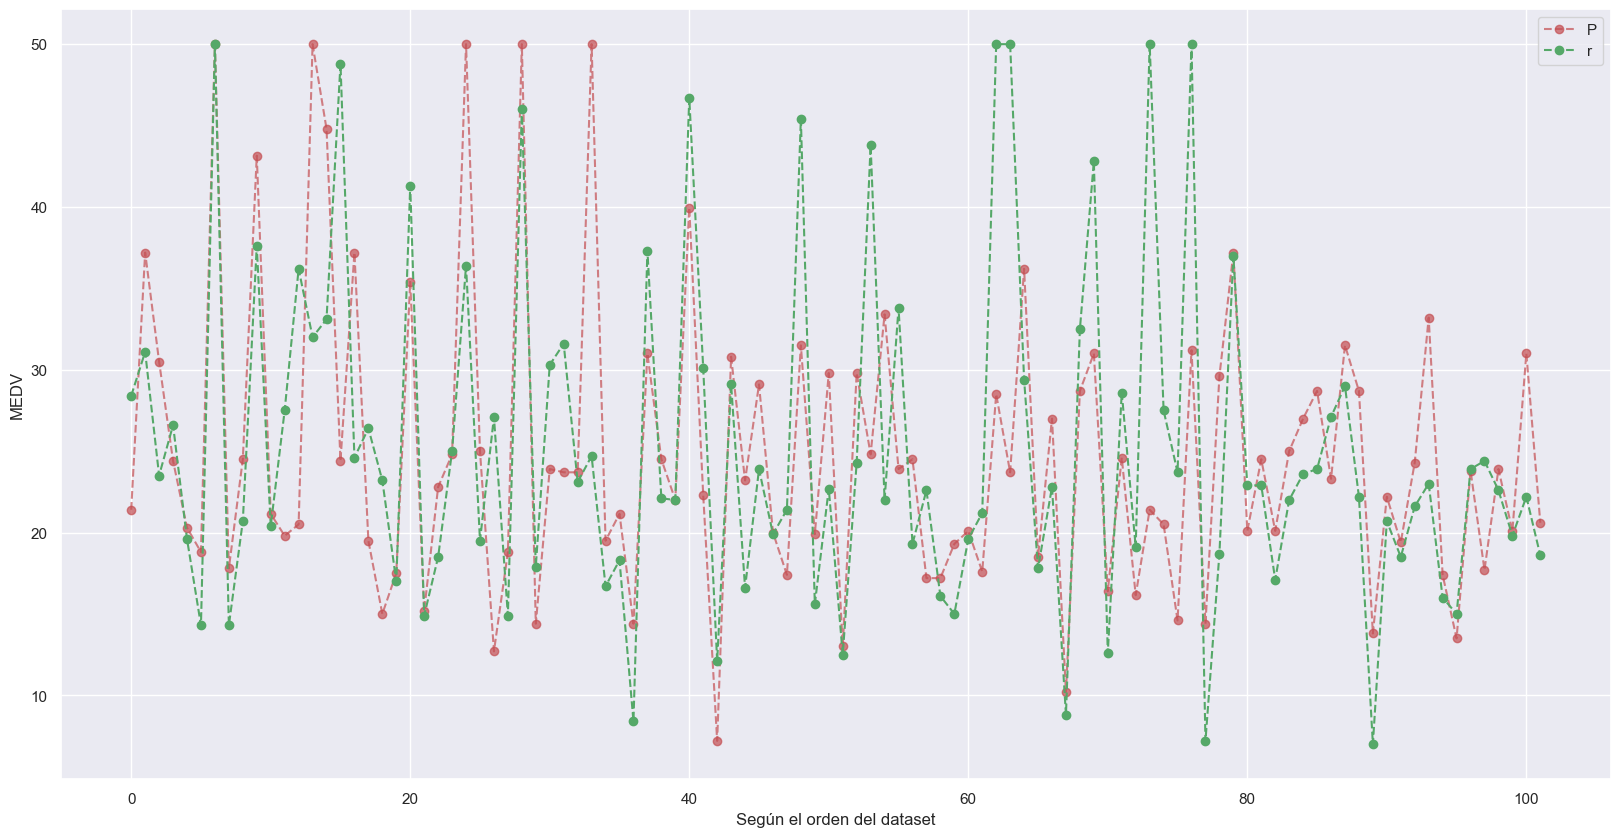

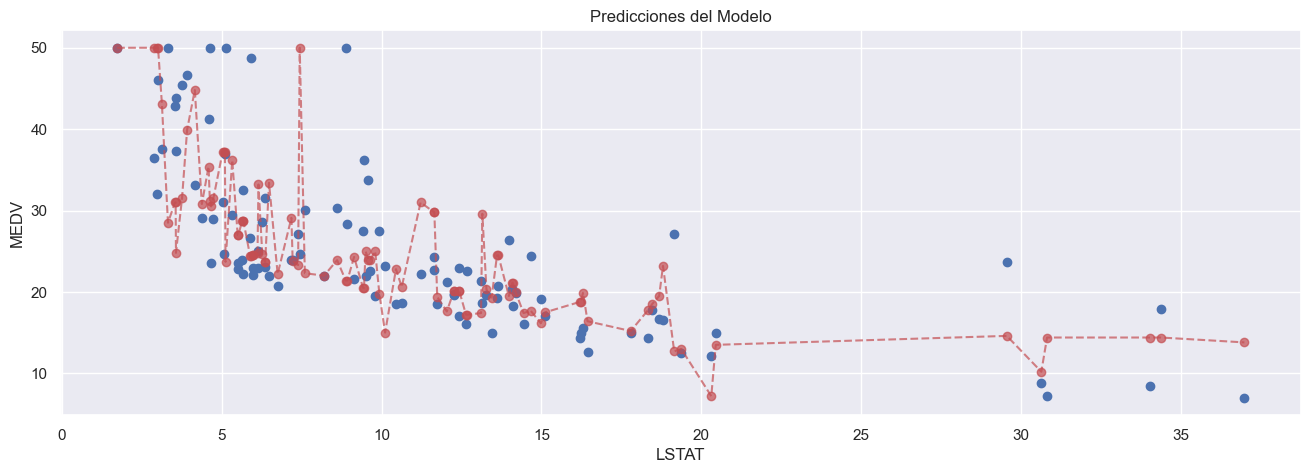

In [47]:
from sklearn.tree import DecisionTreeRegressor

print("Probando el DTR")
probar_modelo(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

Probando el Modelo KNN
Rendimiento del conjunto de Entrenamiento
RMSE: 4.435843652665307
R2: 0.7443283288082831
Rendimiento del conjunto de Testeo
RMSE: 6.568457603891317
R2: 0.5874514364376054


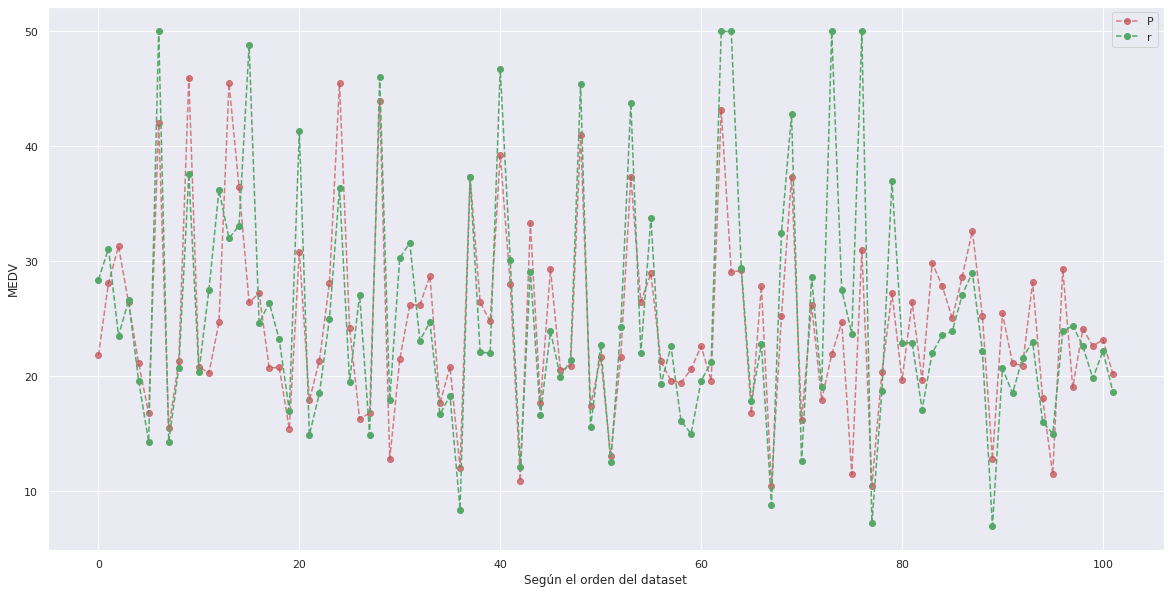

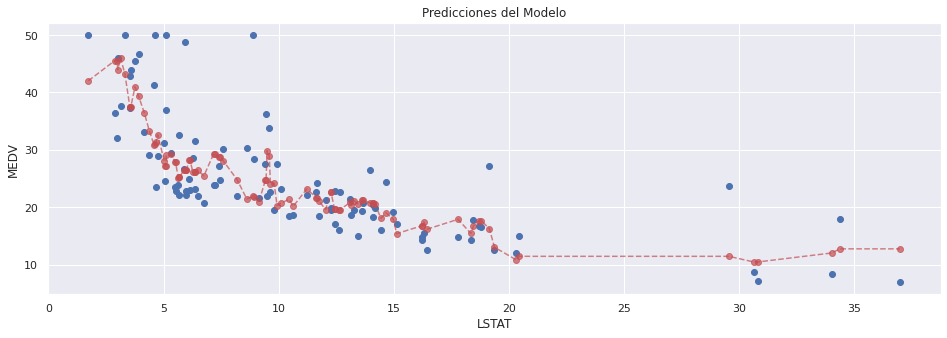

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

print("Probando el Modelo KNN")
probar_modelo(KNeighborsRegressor(), X_train, y_train, X_test, y_test)

Probando el Modelo GBR
Rendimiento del conjunto de Entrenamiento
RMSE: 3.6580438616346567
R2: 0.8261286739086469
Rendimiento del conjunto de Testeo
RMSE: 7.196571987098877
R2: 0.5047783474469738


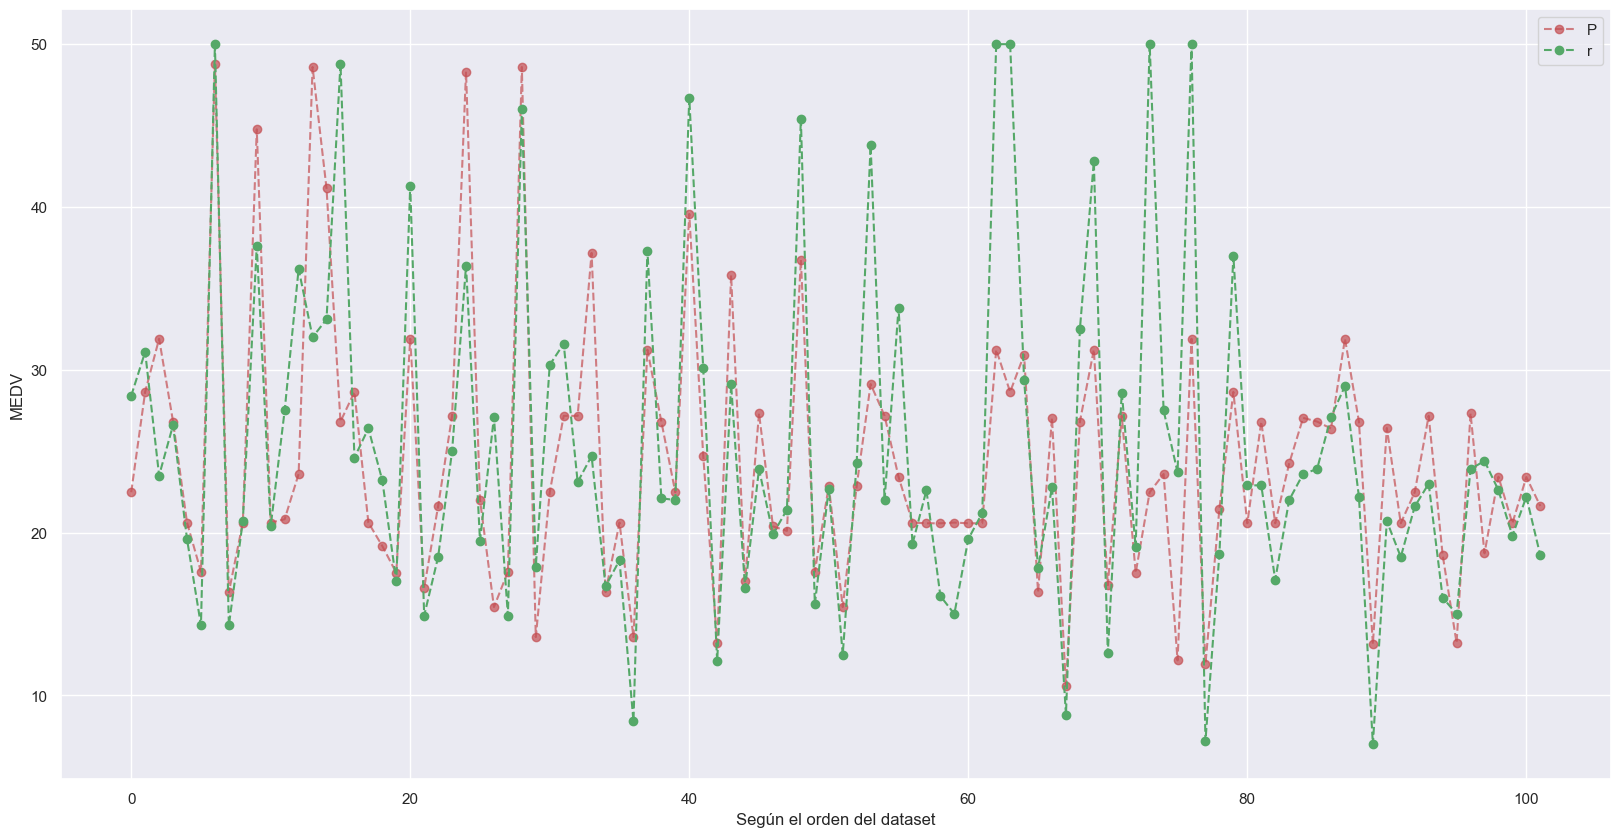

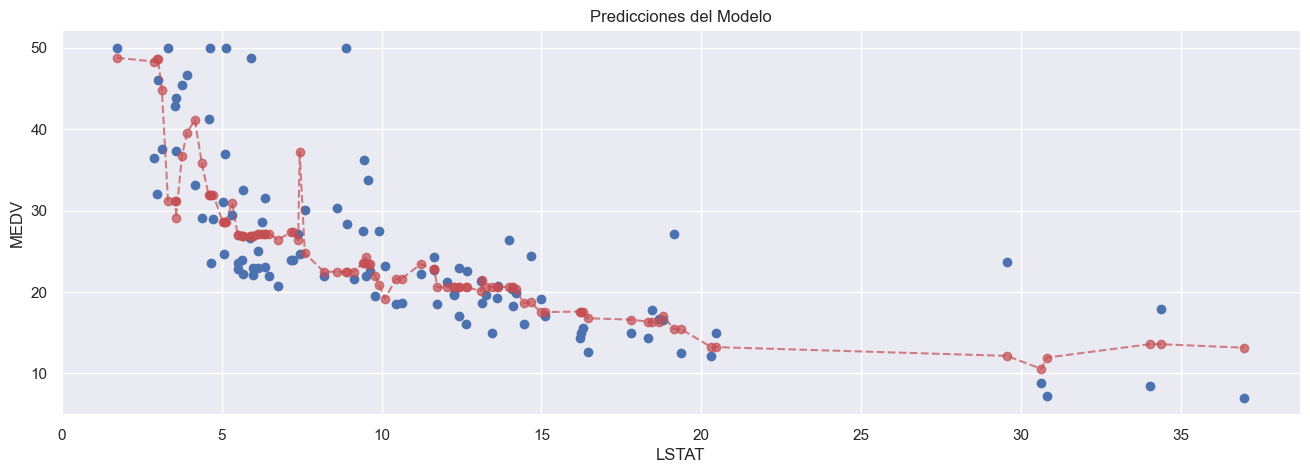

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

print("Probando el Modelo GBR")
probar_modelo(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

Probando el Modelo Ada
Rendimiento del conjunto de Entrenamiento
RMSE: 4.549190153460733
R2: 0.7310953388777458
Rendimiento del conjunto de Testeo
RMSE: 6.591219759833295
R2: 0.5845872128745107


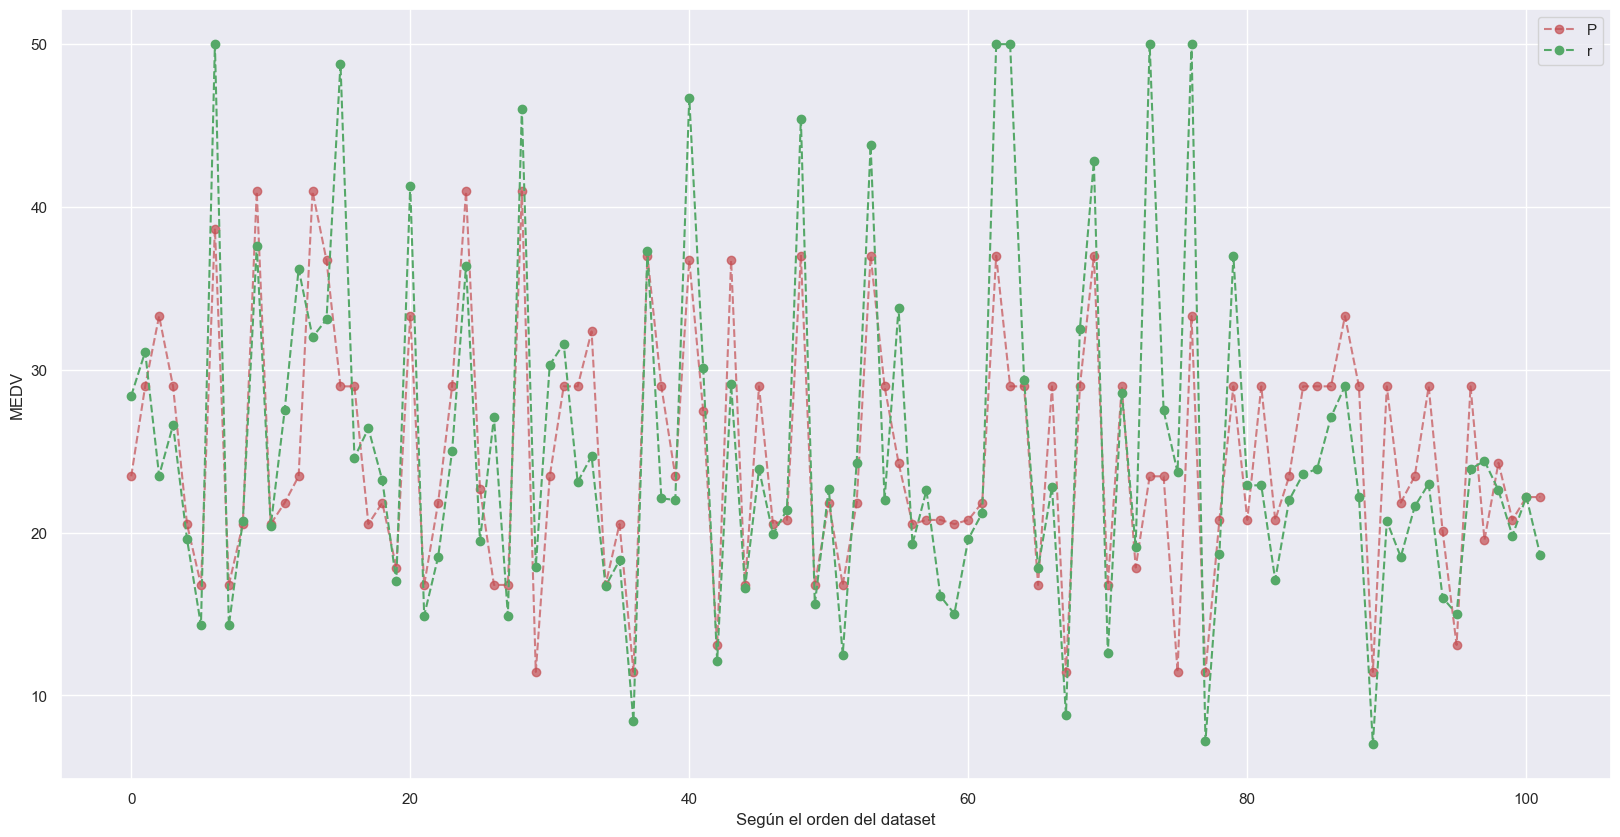

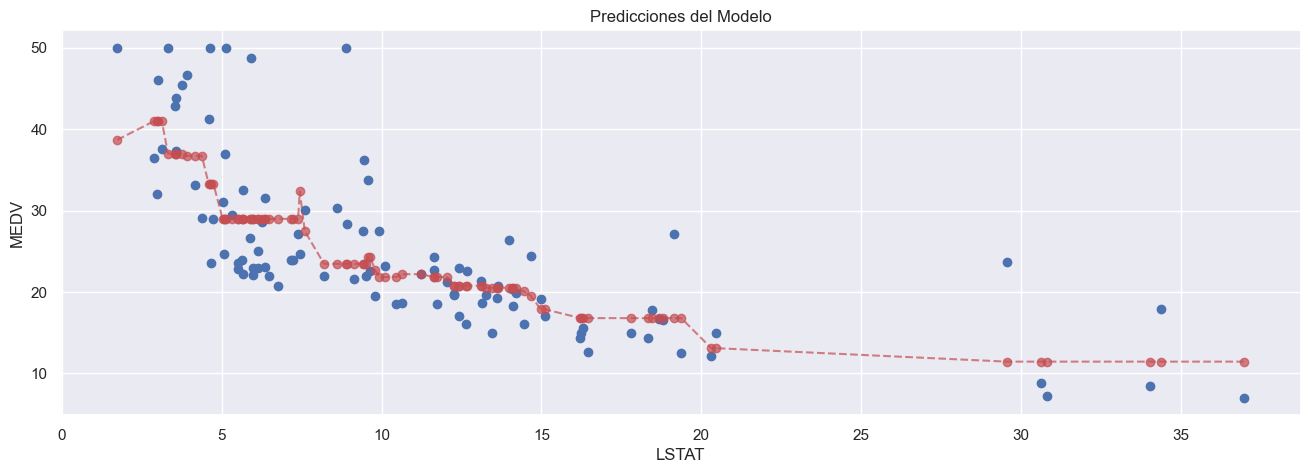

In [49]:
from sklearn.ensemble import AdaBoostRegressor

print("Probando el Modelo Ada")
probar_modelo(AdaBoostRegressor(), X_train, y_train, X_test, y_test)

In [50]:
#Validación cruzada entre los modelos
from sklearn.model_selection import cross_val_score

modelos = {}
modelos['LR_'] = LinearRegression()
modelos['Las'] = Lasso()
modelos['SVM'] = SVR()
modelos['DTR'] = DecisionTreeRegressor()
modelos['KNN'] = KNeighborsRegressor()
modelos['GBR'] = GradientBoostingRegressor()
modelos['Ada'] = AdaBoostRegressor()

resultados_modelos = []

print("Modelos\t\t Mean \t\t Std")

for modelo_a_probar in modelos:
  resultados = cross_val_score(modelos[modelo_a_probar], X_train, y_train, scoring = 'neg_mean_squared_error')
  resultados_modelos.append(resultados)
  print("{}\t\t: {}\t {}".format(modelo_a_probar, round(resultados.mean(), 3), round(resultados.std(), 3)))

NameError: name 'KNeighborsRegressor' is not defined

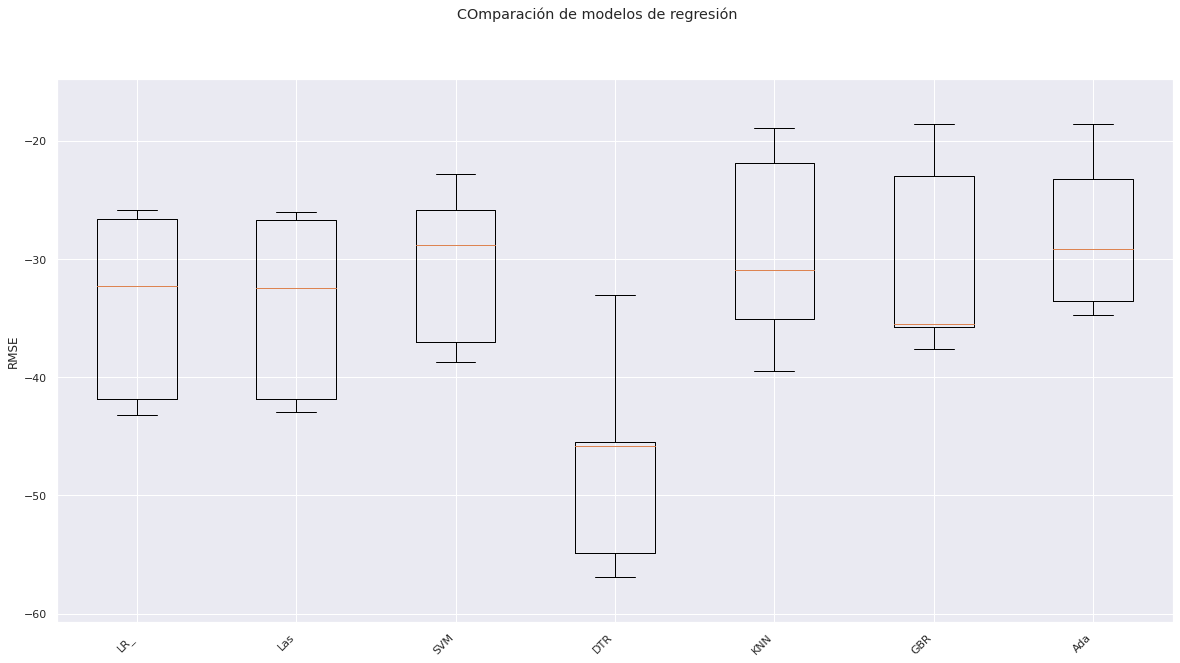

In [ ]:
#Graficar la comparación con velas/cajas

figura = plt.figure()
figura.suptitle('COmparación de modelos de regresión')
ejes = figura.add_subplot(111)

plt.boxplot(resultados_modelos)
ejes.set_xticklabels(modelos, rotation = 45, ha = "right")
ejes.set_ylabel("RMSE")
plt.margins(0.05, 0.1)
plt.show()